In [124]:
import json
import pandas as pd
import matplotlib.pyplot as plt
total_publishing_duration = 60
stall_criteria = 35
file_name = 'res1080fps30bit6gop(2,99,95)loss0-1-0delay500bw100'

In [125]:
# Open the JSON file
with open(f'base_data/{file_name}.json', 'r') as file:
    json_data_data_0 = json.load(file)

# Convert JSON data to DataFrame
df_data_0 = pd.DataFrame(json_data_data_0)

# Subtract the first timestamp from all timestamps in the DataFrame
first_timestamp = df_data_0['_1_rawVideoTimestamp'].iloc[0]
df_data_0['_1_rawVideoTimestamp'] -= first_timestamp
df_data_0['_1_rawVideoTimestamp'] /= 1000

# Filter for timestamps between 15 and 75 seconds
df_data_0 = df_data_0[(df_data_0['_1_rawVideoTimestamp'] >= 15) & (df_data_0['_1_rawVideoTimestamp'] <= 75)]

# Reset the timestamps to start from 0
df_data_0['_1_rawVideoTimestamp'] -= df_data_0['_1_rawVideoTimestamp'].iloc[0]
df_data_0.reset_index(drop=True, inplace=True)

# Percentage of received frames
received_frames_df_data_0 = df_data_0[df_data_0['_5_receiveMp4FrameTimestamp'].notna()]
rendered_frames_df_data_0 = df_data_0[df_data_0['_7_renderFrameTimestamp'].notna()]
num_frames_received_data_0 = len(received_frames_df_data_0)
num_frames_rendered_data_0 = len(rendered_frames_df_data_0)
percentage_of_received_frames_data_0 = round(num_frames_received_data_0 / len(df_data_0) * 100, 2)

# Skipped frames
indices_of_unrendered_data_0 = df_data_0[df_data_0['_7_renderFrameTimestamp'].isna()].index
skipped_segments_data_0 = {}
number_of_skipped_frames_data_0 = 0
for index in indices_of_unrendered_data_0:
    segment_id = df_data_0.loc[index]['_19_segmentID']
    if pd.isna(segment_id):
        continue
    segment_id = int(segment_id)
    if segment_id not in skipped_segments_data_0:
        skipped_segments_data_0[segment_id] = 0
    skipped_segments_data_0[segment_id] += 1
    number_of_skipped_frames_data_0 += 1

# Stalled frames 
rendered_frames_df_data_0 = df_data_0[df_data_0['_7_renderFrameTimestamp'].notna()]
rendered_frames_df_data_0.reset_index(drop=True, inplace=True)
key_frame_indices_data_0 = rendered_frames_df_data_0[rendered_frames_df_data_0['_15_sentType'] == 'key'].index
render_time_differences_preceding_data_0 = []
render_time_differences_consecutive_data_0 = []
last_rendered_frame_data_0 = None
for i in range(len(rendered_frames_df_data_0)):
    current_frame = rendered_frames_df_data_0.iloc[i]
    if i in key_frame_indices_data_0:
        if last_rendered_frame_data_0 is not None:
            preceding_to_key_diff = current_frame['_7_renderFrameTimestamp'] - last_rendered_frame_data_0['_7_renderFrameTimestamp']
            render_time_differences_preceding_data_0.append(preceding_to_key_diff)
        for j in range(i + 1, len(rendered_frames_df_data_0)):
            next_frame = rendered_frames_df_data_0.iloc[j]
            if next_frame['_7_renderFrameTimestamp'] is not pd.NaT:
                key_to_consecutive_diff = next_frame['_7_renderFrameTimestamp'] - current_frame['_7_renderFrameTimestamp']
                render_time_differences_consecutive_data_0.append(key_to_consecutive_diff)
                break
    last_rendered_frame_data_0 = current_frame
average_render_time_diff_preceding_data_0 = sum(render_time_differences_preceding_data_0) / max(len(render_time_differences_preceding_data_0), 1)
total_stall_duration_key_frame_preceding_data_0 = 0
for render_time_diff in render_time_differences_preceding_data_0:
    if render_time_diff >= stall_criteria:
        total_stall_duration_key_frame_preceding_data_0 += render_time_diff - stall_criteria
average_render_time_diff_consecutive_data_0 = sum(render_time_differences_consecutive_data_0) / max(len(render_time_differences_consecutive_data_0), 1)
total_stall_duration_key_frame_consecutive_data_0 = 0
for render_time_diff in render_time_differences_consecutive_data_0:
    if render_time_diff >= stall_criteria:
        total_stall_duration_key_frame_consecutive_data_0 += render_time_diff - stall_criteria
number_of_rendered_key_frames_data_0 = len(key_frame_indices_data_0)
render_time_difference_data_0 = rendered_frames_df_data_0['_7_renderFrameTimestamp'].diff()
avg_render_time_difference_data_0 = render_time_difference_data_0.mean()
max_render_time_difference_data_0 = render_time_difference_data_0.max()
min_render_time_difference_data_0 = render_time_difference_data_0.min()
max_render_time_index_data_0 = render_time_difference_data_0.idxmax()
min_render_time_index_data_0 = render_time_difference_data_0.idxmin()
large_diff_data_0 = render_time_difference_data_0 >= stall_criteria
num_of_stall_events_data_0 = large_diff_data_0.sum()
large_diff_dict_data_0 = render_time_difference_data_0[large_diff_data_0].to_dict()
total_stall_duration_data_0 = 0
for index, duration in large_diff_dict_data_0.items():
    total_stall_duration_data_0 += duration - stall_criteria # Optionally subsctract the stall criteria threshold
key_frames_df_data_0 = df_data_0[df_data_0['_15_sentType'] == 'key']
received_key_frames_df_data_0 = key_frames_df_data_0[key_frames_df_data_0['_16_receivedType'] == 'key']
average_propagation_time_key_frames_data_0 = received_key_frames_df_data_0['_4_propagationTime'].mean()
number_of_received_key_frames_data_0 = received_key_frames_df_data_0.shape[0]
avg_key_frame_size_data_0 = round(key_frames_df_data_0['_14_receivedBytes'].mean() * 8, 2)
delta_frames_df_data_0 = df_data_0[df_data_0['_15_sentType'] == 'delta']
avg_delta_frame_size_data_0 = round(delta_frames_df_data_0['_14_receivedBytes'].mean() * 8, 2)
    
# GOP size
total_amount_of_i_frames_data_0 = df_data_0['_15_sentType'].value_counts().get('key', 0)
total_amount_of_p_frames_data_0 = df_data_0['_15_sentType'].value_counts().get('delta', 0)
gop_size_frames_data_0 = total_amount_of_p_frames_data_0 / total_amount_of_i_frames_data_0 
gop_size_time_data_0 = total_publishing_duration / max(total_amount_of_i_frames_data_0, 1)

# Latencies
avg_total_time_data_0 = df_data_0['_8_totalTime'].mean()
max_total_time_data_0 = df_data_0['_8_totalTime'].max()
min_total_time_data_0 = df_data_0['_8_totalTime'].min()
avg_segmentation_time_data_0 = df_data_0['_2_encodingTime'].mean()
avg_propagation_time_data_0 = df_data_0['_4_propagationTime'].mean()
avg_render_time_data_0 = df_data_0['_6_decodingTime'].mean()
total_time_percentiles_data_0 = df_data_0['_8_totalTime'].quantile([0.25, 0.5, 0.75])
total_time_std_dev_data_0 = df_data_0['_8_totalTime'].std()

# Bitrate 
total_recv_bytes_data_0 = df_data_0['_14_receivedBytes'].sum()
received_bitrate_data_0 = (total_recv_bytes_data_0 * 8) / total_publishing_duration / 1e6

# FPS
receive_time_difference_data_0 = received_frames_df_data_0['_5_receiveMp4FrameTimestamp'].diff()
avg_time_diff_ms_data_0 = receive_time_difference_data_0.mean()
fps_data_0 = 1000 / avg_time_diff_ms_data_0

In [126]:
# Open the JSON file
with open(f'base_data/{file_name} (1).json', 'r') as file:
    json_data_data_1 = json.load(file)

# Convert JSON data to DataFrame
df_data_1 = pd.DataFrame(json_data_data_1)

# Subtract the first timestamp from all timestamps in the DataFrame
first_timestamp = df_data_1['_1_rawVideoTimestamp'].iloc[0]
df_data_1['_1_rawVideoTimestamp'] -= first_timestamp
df_data_1['_1_rawVideoTimestamp'] /= 1000

# Filter for timestamps between 15 and 75 seconds
df_data_1 = df_data_1[(df_data_1['_1_rawVideoTimestamp'] >= 15) & (df_data_1['_1_rawVideoTimestamp'] <= 75)]

# Reset the timestamps to start from 0
df_data_1['_1_rawVideoTimestamp'] -= df_data_1['_1_rawVideoTimestamp'].iloc[0]
df_data_1.reset_index(drop=True, inplace=True)

# Percentage of received frames
received_frames_df_data_1 = df_data_1[df_data_1['_5_receiveMp4FrameTimestamp'].notna()]
rendered_frames_df_data_1 = df_data_1[df_data_1['_7_renderFrameTimestamp'].notna()]
num_frames_received_data_1 = len(received_frames_df_data_1)
num_frames_rendered_data_1 = len(rendered_frames_df_data_1)
percentage_of_received_frames_data_1 = round(num_frames_received_data_1 / len(df_data_1) * 100, 2)

# Skipped frames
indices_of_unrendered_data_1 = df_data_1[df_data_1['_7_renderFrameTimestamp'].isna()].index
skipped_segments_data_1 = {}
number_of_skipped_frames_data_1 = 0
for index in indices_of_unrendered_data_1:
    segment_id = df_data_1.loc[index]['_19_segmentID']
    if pd.isna(segment_id):
        continue
    segment_id = int(segment_id)
    if segment_id not in skipped_segments_data_1:
        skipped_segments_data_1[segment_id] = 0
    skipped_segments_data_1[segment_id] += 1
    number_of_skipped_frames_data_1 += 1

# Stalled frames 
rendered_frames_df_data_1 = df_data_1[df_data_1['_7_renderFrameTimestamp'].notna()]
rendered_frames_df_data_1.reset_index(drop=True, inplace=True)
key_frame_indices_data_1 = rendered_frames_df_data_1[rendered_frames_df_data_1['_15_sentType'] == 'key'].index
render_time_differences_preceding_data_1 = []
render_time_differences_consecutive_data_1 = []
last_rendered_frame_data_1 = None
for i in range(len(rendered_frames_df_data_1)):
    current_frame = rendered_frames_df_data_1.iloc[i]
    if i in key_frame_indices_data_1:
        if last_rendered_frame_data_1 is not None:
            preceding_to_key_diff = current_frame['_7_renderFrameTimestamp'] - last_rendered_frame_data_1['_7_renderFrameTimestamp']
            render_time_differences_preceding_data_1.append(preceding_to_key_diff)
        for j in range(i + 1, len(rendered_frames_df_data_1)):
            next_frame = rendered_frames_df_data_1.iloc[j]
            if next_frame['_7_renderFrameTimestamp'] is not pd.NaT:
                key_to_consecutive_diff = next_frame['_7_renderFrameTimestamp'] - current_frame['_7_renderFrameTimestamp']
                render_time_differences_consecutive_data_1.append(key_to_consecutive_diff)
                break
    last_rendered_frame_data_1 = current_frame
average_render_time_diff_preceding_data_1 = sum(render_time_differences_preceding_data_1) / max(len(render_time_differences_preceding_data_1), 1)
total_stall_duration_key_frame_preceding_data_1 = 0
for render_time_diff in render_time_differences_preceding_data_1:
    if render_time_diff >= stall_criteria:
        total_stall_duration_key_frame_preceding_data_1 += render_time_diff - stall_criteria
average_render_time_diff_consecutive_data_1 = sum(render_time_differences_consecutive_data_1) / max(len(render_time_differences_consecutive_data_1), 1)
total_stall_duration_key_frame_consecutive_data_1 = 0
for render_time_diff in render_time_differences_consecutive_data_1:
    if render_time_diff >= stall_criteria:
        total_stall_duration_key_frame_consecutive_data_1 += render_time_diff - stall_criteria
number_of_rendered_key_frames_data_1 = len(key_frame_indices_data_1)
render_time_difference_data_1 = rendered_frames_df_data_1['_7_renderFrameTimestamp'].diff()
avg_render_time_difference_data_1 = render_time_difference_data_1.mean()
max_render_time_difference_data_1 = render_time_difference_data_1.max()
min_render_time_difference_data_1 = render_time_difference_data_1.min()
max_render_time_index_data_1 = render_time_difference_data_1.idxmax()
min_render_time_index_data_1 = render_time_difference_data_1.idxmin()
large_diff_data_1 = render_time_difference_data_1 >= stall_criteria
num_of_stall_events_data_1 = large_diff_data_1.sum()
large_diff_dict_data_1 = render_time_difference_data_1[large_diff_data_1].to_dict()
total_stall_duration_data_1 = 0
for index, duration in large_diff_dict_data_1.items():
    total_stall_duration_data_1 += duration - stall_criteria # Optionally subsctract the stall criteria threshold
key_frames_df_data_1 = df_data_1[df_data_1['_15_sentType'] == 'key']
received_key_frames_df_data_1 = key_frames_df_data_1[key_frames_df_data_1['_16_receivedType'] == 'key']
average_propagation_time_key_frames_data_1 = received_key_frames_df_data_1['_4_propagationTime'].mean()
number_of_received_key_frames_data_1 = received_key_frames_df_data_1.shape[0]
avg_key_frame_size_data_1 = round(key_frames_df_data_1['_14_receivedBytes'].mean() * 8, 2)
delta_frames_df_data_1 = df_data_1[df_data_1['_15_sentType'] == 'delta']
avg_delta_frame_size_data_1 = round(delta_frames_df_data_1['_14_receivedBytes'].mean() * 8, 2)
    
# GOP size
total_amount_of_i_frames_data_1 = df_data_1['_15_sentType'].value_counts().get('key', 0)
total_amount_of_p_frames_data_1 = df_data_1['_15_sentType'].value_counts().get('delta', 0)
gop_size_frames_data_1 = total_amount_of_p_frames_data_1 / total_amount_of_i_frames_data_1 
gop_size_time_data_1 = total_publishing_duration / max(total_amount_of_i_frames_data_1, 1)

# Latencies
avg_total_time_data_1 = df_data_1['_8_totalTime'].mean()
max_total_time_data_1 = df_data_1['_8_totalTime'].max()
min_total_time_data_1 = df_data_1['_8_totalTime'].min()
avg_segmentation_time_data_1 = df_data_1['_2_encodingTime'].mean()
avg_propagation_time_data_1 = df_data_1['_4_propagationTime'].mean()
avg_render_time_data_1 = df_data_1['_6_decodingTime'].mean()
total_time_percentiles_data_1 = df_data_1['_8_totalTime'].quantile([0.25, 0.5, 0.75])
total_time_std_dev_data_1 = df_data_1['_8_totalTime'].std()

# Bitrate 
total_recv_bytes_data_1 = df_data_1['_14_receivedBytes'].sum()
received_bitrate_data_1 = (total_recv_bytes_data_1 * 8) / total_publishing_duration / 1e6

# FPS
receive_time_difference_data_1 = received_frames_df_data_1['_5_receiveMp4FrameTimestamp'].diff()
avg_time_diff_ms_data_1 = receive_time_difference_data_1.mean()
fps_data_1 = 1000 / avg_time_diff_ms_data_1

In [127]:
# Open the JSON file
with open(f'base_data/{file_name} (2).json', 'r') as file:
    json_data_data_2 = json.load(file)

# Convert JSON data to DataFrame
df_data_2 = pd.DataFrame(json_data_data_2)

# Subtract the first timestamp from all timestamps in the DataFrame
first_timestamp = df_data_2['_1_rawVideoTimestamp'].iloc[0]
df_data_2['_1_rawVideoTimestamp'] -= first_timestamp
df_data_2['_1_rawVideoTimestamp'] /= 1000

# Filter for timestamps between 15 and 75 seconds
df_data_2 = df_data_2[(df_data_2['_1_rawVideoTimestamp'] >= 15) & (df_data_2['_1_rawVideoTimestamp'] <= 75)]

# Reset the timestamps to start from 0
df_data_2['_1_rawVideoTimestamp'] -= df_data_2['_1_rawVideoTimestamp'].iloc[0]
df_data_2.reset_index(drop=True, inplace=True)

# Percentage of received frames
received_frames_df_data_2 = df_data_2[df_data_2['_5_receiveMp4FrameTimestamp'].notna()]
rendered_frames_df_data_2 = df_data_2[df_data_2['_7_renderFrameTimestamp'].notna()]
num_frames_received_data_2 = len(received_frames_df_data_2)
num_frames_rendered_data_2 = len(rendered_frames_df_data_2)
percentage_of_received_frames_data_2 = round(num_frames_received_data_2 / len(df_data_2) * 100, 2)

# Skipped frames
indices_of_unrendered_data_2 = df_data_2[df_data_2['_7_renderFrameTimestamp'].isna()].index
skipped_segments_data_2 = {}
number_of_skipped_frames_data_2 = 0
for index in indices_of_unrendered_data_2:
    segment_id = df_data_2.loc[index]['_19_segmentID']
    if pd.isna(segment_id):
        continue
    segment_id = int(segment_id)
    if segment_id not in skipped_segments_data_2:
        skipped_segments_data_2[segment_id] = 0
    skipped_segments_data_2[segment_id] += 1
    number_of_skipped_frames_data_2 += 1

# Stalled frames 
rendered_frames_df_data_2 = df_data_2[df_data_2['_7_renderFrameTimestamp'].notna()]
rendered_frames_df_data_2.reset_index(drop=True, inplace=True)
key_frame_indices_data_2 = rendered_frames_df_data_2[rendered_frames_df_data_2['_15_sentType'] == 'key'].index
render_time_differences_preceding_data_2 = []
render_time_differences_consecutive_data_2 = []
last_rendered_frame_data_2 = None
for i in range(len(rendered_frames_df_data_2)):
    current_frame = rendered_frames_df_data_2.iloc[i]
    if i in key_frame_indices_data_2:
        if last_rendered_frame_data_2 is not None:
            preceding_to_key_diff = current_frame['_7_renderFrameTimestamp'] - last_rendered_frame_data_2['_7_renderFrameTimestamp']
            render_time_differences_preceding_data_2.append(preceding_to_key_diff)
        for j in range(i + 1, len(rendered_frames_df_data_2)):
            next_frame = rendered_frames_df_data_2.iloc[j]
            if next_frame['_7_renderFrameTimestamp'] is not pd.NaT:
                key_to_consecutive_diff = next_frame['_7_renderFrameTimestamp'] - current_frame['_7_renderFrameTimestamp']
                render_time_differences_consecutive_data_2.append(key_to_consecutive_diff)
                break
    last_rendered_frame_data_2 = current_frame
average_render_time_diff_preceding_data_2 = sum(render_time_differences_preceding_data_2) / max(len(render_time_differences_preceding_data_2), 1)
total_stall_duration_key_frame_preceding_data_2 = 0
for render_time_diff in render_time_differences_preceding_data_2:
    if render_time_diff >= stall_criteria:
        total_stall_duration_key_frame_preceding_data_2 += render_time_diff - stall_criteria
average_render_time_diff_consecutive_data_2 = sum(render_time_differences_consecutive_data_2) / max(len(render_time_differences_consecutive_data_2), 1)
total_stall_duration_key_frame_consecutive_data_2 = 0
for render_time_diff in render_time_differences_consecutive_data_2:
    if render_time_diff >= stall_criteria:
        total_stall_duration_key_frame_consecutive_data_2 += render_time_diff - stall_criteria
number_of_rendered_key_frames_data_2 = len(key_frame_indices_data_2)
render_time_difference_data_2 = rendered_frames_df_data_2['_7_renderFrameTimestamp'].diff()
avg_render_time_difference_data_2 = render_time_difference_data_2.mean()
max_render_time_difference_data_2 = render_time_difference_data_2.max()
min_render_time_difference_data_2 = render_time_difference_data_2.min()
max_render_time_index_data_2 = render_time_difference_data_2.idxmax()
min_render_time_index_data_2 = render_time_difference_data_2.idxmin()
large_diff_data_2 = render_time_difference_data_2 >= stall_criteria
num_of_stall_events_data_2 = large_diff_data_2.sum()
large_diff_dict_data_2 = render_time_difference_data_2[large_diff_data_2].to_dict()
total_stall_duration_data_2 = 0
for index, duration in large_diff_dict_data_2.items():
    total_stall_duration_data_2 += duration - stall_criteria # Optionally subsctract the stall criteria threshold
key_frames_df_data_2 = df_data_2[df_data_2['_15_sentType'] == 'key']
received_key_frames_df_data_2 = key_frames_df_data_2[key_frames_df_data_2['_16_receivedType'] == 'key']
average_propagation_time_key_frames_data_2 = received_key_frames_df_data_2['_4_propagationTime'].mean()
number_of_received_key_frames_data_2 = received_key_frames_df_data_2.shape[0]
avg_key_frame_size_data_2 = round(key_frames_df_data_2['_14_receivedBytes'].mean() * 8, 2)
delta_frames_df_data_2 = df_data_2[df_data_2['_15_sentType'] == 'delta']
avg_delta_frame_size_data_2 = round(delta_frames_df_data_2['_14_receivedBytes'].mean() * 8, 2)
    
# GOP size
total_amount_of_i_frames_data_2 = df_data_2['_15_sentType'].value_counts().get('key', 0)
total_amount_of_p_frames_data_2 = df_data_2['_15_sentType'].value_counts().get('delta', 0)
gop_size_frames_data_2 = total_amount_of_p_frames_data_2 / total_amount_of_i_frames_data_2 
gop_size_time_data_2 = total_publishing_duration / max(total_amount_of_i_frames_data_2, 1)

# Latencies
avg_total_time_data_2 = df_data_2['_8_totalTime'].mean()
max_total_time_data_2 = df_data_2['_8_totalTime'].max()
min_total_time_data_2 = df_data_2['_8_totalTime'].min()
avg_segmentation_time_data_2 = df_data_2['_2_encodingTime'].mean()
avg_propagation_time_data_2 = df_data_2['_4_propagationTime'].mean()
avg_render_time_data_2 = df_data_2['_6_decodingTime'].mean()
total_time_percentiles_data_2 = df_data_2['_8_totalTime'].quantile([0.25, 0.5, 0.75])
total_time_std_dev_data_2 = df_data_2['_8_totalTime'].std()

# Bitrate 
total_recv_bytes_data_2 = df_data_2['_14_receivedBytes'].sum()
received_bitrate_data_2 = (total_recv_bytes_data_2 * 8) / total_publishing_duration / 1e6

# FPS
receive_time_difference_data_2 = received_frames_df_data_2['_5_receiveMp4FrameTimestamp'].diff()
avg_time_diff_ms_data_2 = receive_time_difference_data_2.mean()
fps_data_2 = 1000 / avg_time_diff_ms_data_2

In [128]:
# Frame Information
print("=== Frame Information ===")
avg_total_frames = (len(df_data_0) + len(df_data_1) + len(df_data_2)) / 3
print("Total amount of frames: {} vs {} vs {} (Average: {:.2f})".format(len(df_data_0), len(df_data_1), len(df_data_2), avg_total_frames))
avg_received_frames = (num_frames_received_data_0 + num_frames_received_data_1 + num_frames_received_data_2) / 3
print("Amount of received frames: {} vs {} vs {} (Average: {:.2f})".format(num_frames_received_data_0, num_frames_received_data_1, num_frames_received_data_2, avg_received_frames))
avg_rendered_frames = (num_frames_rendered_data_0 + num_frames_rendered_data_1 + num_frames_rendered_data_2) / 3
print("Amount of rendered frames: {} vs {} vs {} (Average: {:.2f})".format(num_frames_rendered_data_0, num_frames_rendered_data_1, num_frames_rendered_data_2, avg_rendered_frames))
avg_percentage_received_frames = (percentage_of_received_frames_data_0 + percentage_of_received_frames_data_1 + percentage_of_received_frames_data_2) / 3
print("Percentage of received frames: {:.2f}% vs {:.2f}% vs {:.2f}% (Average: {:.2f}%)".format(percentage_of_received_frames_data_0, percentage_of_received_frames_data_1, percentage_of_received_frames_data_2, avg_percentage_received_frames))

# Skipped Frames
print("\n=== Skipped Frames ===")
avg_skipped_frames = (number_of_skipped_frames_data_0 + number_of_skipped_frames_data_1 + number_of_skipped_frames_data_2) / 3
print("Number of skipped frames: {} vs {} vs {} (Average: {:.2f})".format(number_of_skipped_frames_data_0, number_of_skipped_frames_data_1, number_of_skipped_frames_data_2, avg_skipped_frames))
print("Skipped segments and respective number of frames: {} vs {} vs {}".format(skipped_segments_data_0, skipped_segments_data_1, skipped_segments_data_2))

# Stalled Frames
print("\n=== Stalled Frames ===")
avg_render_time_difference = (avg_render_time_difference_data_0 + avg_render_time_difference_data_1 + avg_render_time_difference_data_2) / 3
print("Average render time difference (ms): {:.2f} vs {:.2f} vs {:.2f} (Average: {:.2f})".format(round(avg_render_time_difference_data_0, 2), round(avg_render_time_difference_data_1, 2), round(avg_render_time_difference_data_2, 2), round(avg_render_time_difference, 2)))
avg_render_time_difference_key_frame_preceding = (average_render_time_diff_preceding_data_0 + average_render_time_diff_preceding_data_1 + average_render_time_diff_preceding_data_2) / 3
print("Average render time difference preceding key frame (ms): {:.2f} vs {:.2f} vs {:.2f} (Average: {:.2f})".format(round(average_render_time_diff_preceding_data_0, 2), round(average_render_time_diff_preceding_data_1, 2), round(average_render_time_diff_preceding_data_2, 2), round(avg_render_time_difference_key_frame_preceding, 2)))
avg_render_time_difference_key_frame_consecutive = (average_render_time_diff_consecutive_data_0 + average_render_time_diff_consecutive_data_1 + average_render_time_diff_consecutive_data_2) / 3
print("Average render time difference following key frame (ms): {:.2f} vs {:.2f} vs {:.2f} (Average: {:.2f})".format(round(average_render_time_diff_consecutive_data_0, 2), round(average_render_time_diff_consecutive_data_1, 2), round(average_render_time_diff_consecutive_data_2, 2), round(avg_render_time_difference_key_frame_consecutive, 2)))
print("Maximum render time difference (ms): {} at index {} vs {} at index {} vs {} at index {}".format(
    max_render_time_difference_data_0, max_render_time_index_data_0,
    max_render_time_difference_data_1, max_render_time_index_data_1,
    max_render_time_difference_data_2, max_render_time_index_data_2))
print("Minimum render time difference (ms): {} at index {} vs {} at index {} vs {} at index {}".format(
    min_render_time_difference_data_0, min_render_time_index_data_0,
    min_render_time_difference_data_1, min_render_time_index_data_1,
    min_render_time_difference_data_2, min_render_time_index_data_2))
avg_num_of_stall_events = (num_of_stall_events_data_0 + num_of_stall_events_data_1 + num_of_stall_events_data_2) / 3
print("Number of frames with render time difference >= {} ms: {} vs {} vs {} (Average: {:.2f})".format(
    stall_criteria, num_of_stall_events_data_0, num_of_stall_events_data_1, num_of_stall_events_data_2, avg_num_of_stall_events))
avg_stall_duration = (total_stall_duration_data_0 + total_stall_duration_data_1 + total_stall_duration_data_2) / 3
print("Total stall duration (s): {:.3f} vs {:.3f} vs {:.3f} (Average: {:.3f})".format(
    round(total_stall_duration_data_0 / 1000, 3), round(total_stall_duration_data_1 / 1000, 3), 
    round(total_stall_duration_data_2 / 1000, 3), round(avg_stall_duration / 1000, 3)))
avg_stall_duration_key_frame_preceding = (total_stall_duration_key_frame_preceding_data_0 + total_stall_duration_key_frame_preceding_data_1 + total_stall_duration_key_frame_preceding_data_2) / 3
print("Total stall duration preceding key frame (s): {:.3f} vs {:.3f} vs {:.3f} (Average: {:.3f})".format(
    round(total_stall_duration_key_frame_preceding_data_0 / 1000, 3), round(total_stall_duration_key_frame_preceding_data_1 / 1000, 3), 
    round(total_stall_duration_key_frame_preceding_data_2 / 1000, 3), round(avg_stall_duration_key_frame_preceding / 1000, 3)))
avg_stall_duration_key_frame_consecutive = (total_stall_duration_key_frame_consecutive_data_0 + total_stall_duration_key_frame_consecutive_data_1 + total_stall_duration_key_frame_consecutive_data_2) / 3
print("Total stall duration following key frame (s): {:.3f} vs {:.3f} vs {:.3f} (Average: {:.3f})".format(
    round(total_stall_duration_key_frame_consecutive_data_0 / 1000, 3), round(total_stall_duration_key_frame_consecutive_data_1 / 1000, 3), 
    round(total_stall_duration_key_frame_consecutive_data_2 / 1000, 3), round(avg_stall_duration_key_frame_consecutive / 1000, 3)))

# GoP Size
print("\n=== GoP Size ===")
avg_i_frames = (total_amount_of_i_frames_data_0 + total_amount_of_i_frames_data_1 + total_amount_of_i_frames_data_2) / 3
print("Total number of I-Frames: {} vs {} vs {} (Average: {:.2f})".format(total_amount_of_i_frames_data_0, total_amount_of_i_frames_data_1, total_amount_of_i_frames_data_2, avg_i_frames))
avg_number_of_received_key_frames = (number_of_received_key_frames_data_0 + number_of_received_key_frames_data_1 + number_of_received_key_frames_data_2) / 3
print("Number of received I-Frames: {} vs {} vs {} (Average: {:.2f})".format(
    number_of_received_key_frames_data_0, number_of_received_key_frames_data_1, number_of_received_key_frames_data_2, avg_number_of_received_key_frames))
avg_number_of_rendered_key_frames = (number_of_rendered_key_frames_data_0 + number_of_rendered_key_frames_data_1 + number_of_rendered_key_frames_data_2) / 3
print("Number of rendered I-Frames: {} vs {} vs {} (Average: {:.2f})".format(number_of_rendered_key_frames_data_0, number_of_rendered_key_frames_data_1, number_of_rendered_key_frames_data_2, avg_number_of_rendered_key_frames))                                                                    
avg_gop_size_frames = (gop_size_frames_data_0 + gop_size_frames_data_1 + gop_size_frames_data_2) / 3
print("Average GoP size frames: {:.2f} vs {:.2f} vs {:.2f} (Average: {:.2f})".format(
    round(gop_size_frames_data_0, 2), round(gop_size_frames_data_1, 2), 
    round(gop_size_frames_data_2, 2), round(avg_gop_size_frames, 2)))
avg_gop_size_time = (gop_size_time_data_0 + gop_size_time_data_1 + gop_size_time_data_2) / 3
print("Average GoP size time (s): {:.3f} vs {:.3f} vs {:.3f} (Average: {:.3f})".format(
    round(gop_size_time_data_0, 3), round(gop_size_time_data_1, 3), 
    round(gop_size_time_data_2, 3), round(avg_gop_size_time, 3)))

# Latencies
print("\n=== Latencies ===")
avg_total_time = (avg_total_time_data_0 + avg_total_time_data_1 + avg_total_time_data_2) / 3
print("Average total time (ms): {:.2f} vs {:.2f} vs {:.2f} (Average: {:.2f})".format(
    round(avg_total_time_data_0, 2), round(avg_total_time_data_1, 2), 
    round(avg_total_time_data_2, 2), round(avg_total_time, 2)))
print("Maximum total time (ms): {} vs {} vs {}".format(max_total_time_data_0, max_total_time_data_1, max_total_time_data_2))
print("Minimum total time (ms): {} vs {} vs {}".format(min_total_time_data_0, min_total_time_data_1, min_total_time_data_2))
avg_encoding_time = (avg_segmentation_time_data_0 + avg_segmentation_time_data_1 + avg_segmentation_time_data_2) / 3
print("Average encoding time (ms): {:.2f} vs {:.2f} vs {:.2f} (Average: {:.2f})".format(
    round(avg_segmentation_time_data_0, 2), round(avg_segmentation_time_data_1, 2), 
    round(avg_segmentation_time_data_2, 2), round(avg_encoding_time, 2)))
avg_propagation_time = (avg_propagation_time_data_0 + avg_propagation_time_data_1 + avg_propagation_time_data_2) / 3
print("Average propagation time (ms): {:.2f} vs {:.2f} vs {:.2f} (Average: {:.2f})".format(
    round(avg_propagation_time_data_0, 2), round(avg_propagation_time_data_1, 2), 
    round(avg_propagation_time_data_2, 2), round(avg_propagation_time, 2)))
avg_propagation_time_key_frames = (average_propagation_time_key_frames_data_0 + average_propagation_time_key_frames_data_1 + average_propagation_time_key_frames_data_2) / 3
print("Average key frame propagation time (ms): {:.2f} vs {:.2f} vs {:.2f} (Average: {:.2f})".format(
    average_propagation_time_key_frames_data_0, average_propagation_time_key_frames_data_1, average_propagation_time_key_frames_data_2, avg_propagation_time_key_frames))
avg_decoding_time = (avg_render_time_data_0 + avg_render_time_data_1 + avg_render_time_data_2) / 3
print("Average decoding time (ms): {:.2f} vs {:.2f} vs {:.2f} (Average: {:.2f})".format(
    round(avg_render_time_data_0, 2), round(avg_render_time_data_1, 2), 
    round(avg_render_time_data_2, 2), round(avg_decoding_time, 2)))
avg_25th_percentile = (total_time_percentiles_data_0[0.25] + total_time_percentiles_data_1[0.25] + total_time_percentiles_data_2[0.25]) / 3
avg_50th_percentile = (total_time_percentiles_data_0[0.5] + total_time_percentiles_data_1[0.5] + total_time_percentiles_data_2[0.5]) / 3
avg_75th_percentile = (total_time_percentiles_data_0[0.75] + total_time_percentiles_data_1[0.75] + total_time_percentiles_data_2[0.75]) / 3
print("25th Percentile (ms): {:.2f} vs {:.2f} vs {:.2f} | Average: {:.2f}".format(
    total_time_percentiles_data_0[0.25], total_time_percentiles_data_1[0.25], total_time_percentiles_data_2[0.25],
    avg_25th_percentile
))
print("50th Percentile (Median) (ms): {:.2f} vs {:.2f} vs {:.2f} | Average: {:.2f}".format(
    total_time_percentiles_data_0[0.5], total_time_percentiles_data_1[0.5], total_time_percentiles_data_2[0.5],
    avg_50th_percentile
))
print("75th Percentile (ms): {:.2f} vs {:.2f} vs {:.2f} | Average: {:.2f}".format(
    total_time_percentiles_data_0[0.75], total_time_percentiles_data_1[0.75], total_time_percentiles_data_2[0.75],
    avg_75th_percentile
))
avg_std_dev = (total_time_std_dev_data_0 + total_time_std_dev_data_1 + total_time_std_dev_data_2) / 3
print("Standard Deviation (ms): {:.2f} vs {:.2f} vs {:.2f} | Average: {:.2f}".format(
    total_time_std_dev_data_0, total_time_std_dev_data_1, total_time_std_dev_data_2,
    avg_std_dev
))

# Performance Metrics
print("\n=== Performance Metrics ===")
avg_received_bitrate = (received_bitrate_data_0 + received_bitrate_data_1 + received_bitrate_data_2) / 3
print("Received Bitrate: {:.2f} Mbps vs {:.2f} Mbps vs {:.2f} Mbps (Average: {:.2f} Mbps)".format(
    received_bitrate_data_0, received_bitrate_data_1, received_bitrate_data_2, avg_received_bitrate))
avg_key_frame_size = (avg_key_frame_size_data_0 + avg_key_frame_size_data_1 + avg_key_frame_size_data_2) / 3
print("Average I-Frame size (bits): {:.2f} vs {:.2f} vs {:.2f} (Average: {:.2f})".format(
    avg_key_frame_size_data_0, avg_key_frame_size_data_1, avg_key_frame_size_data_2, avg_key_frame_size))
avg_delta_frame_size = (avg_delta_frame_size_data_0 + avg_delta_frame_size_data_1 + avg_delta_frame_size_data_2) / 3
print("Average P-Frame size (bits): {:.2f} vs {:.2f} vs {:.2f} (Average: {:.2f})".format(
    avg_delta_frame_size_data_0, avg_delta_frame_size_data_1, avg_delta_frame_size_data_2, avg_delta_frame_size))
avg_fps = (fps_data_0 + fps_data_1 + fps_data_2) / 3
print("Frames per second (FPS): {:.2f} vs {:.2f} vs {:.2f} (Average: {:.2f})".format(
    round(fps_data_0, 2), round(fps_data_1, 2), round(fps_data_2, 2), round(avg_fps, 2)))


=== Frame Information ===
Total amount of frames: 1800 vs 1800 vs 1800 (Average: 1800.00)
Amount of received frames: 1615 vs 1680 vs 1694 (Average: 1663.00)
Amount of rendered frames: 1593 vs 1662 vs 1679 (Average: 1644.67)
Percentage of received frames: 89.72% vs 93.33% vs 94.11% (Average: 92.39%)

=== Skipped Frames ===
Number of skipped frames: 207 vs 138 vs 121 (Average: 155.33)
Skipped segments and respective number of frames: {38: 9, 40: 14, 41: 15, 42: 10, 43: 11, 45: 8, 46: 15, 54: 7, 55: 1, 56: 10, 59: 14, 60: 3, 61: 1, 62: 14, 63: 11, 65: 8, 66: 12, 67: 9, 68: 15, 70: 11, 71: 7, 72: 2} vs {37: 12, 39: 1, 40: 15, 41: 7, 42: 13, 44: 4, 47: 11, 49: 2, 51: 5, 52: 7, 53: 13, 54: 10, 55: 4, 58: 4, 59: 1, 60: 7, 62: 7, 63: 13, 68: 2} vs {39: 15, 41: 11, 45: 6, 47: 15, 49: 7, 51: 4, 52: 7, 53: 8, 54: 15, 55: 15, 56: 4, 59: 4, 60: 2, 61: 7, 62: 1}

=== Stalled Frames ===
Average render time difference (ms): 37.67 vs 36.11 vs 35.74 (Average: 36.50)
Average render time difference preced

In [129]:
pd.options.display.float_format = '{:.3f}'.format
table_data = {
    'MoQ 1': [
        num_frames_rendered_data_0 / len(df_data_0) * 100,
        number_of_skipped_frames_data_0,
        num_of_stall_events_data_0,
        total_stall_duration_data_0 / 1000,
        avg_total_time_data_0
    ],
    'MoQ 2': [
        num_frames_rendered_data_1 / len(df_data_1) * 100,
        number_of_skipped_frames_data_1,
        num_of_stall_events_data_1,
        total_stall_duration_data_1 / 1000,
        avg_total_time_data_1
    ],
    'MoQ 3': [
        num_frames_rendered_data_2 / len(df_data_2) * 100,
        number_of_skipped_frames_data_2,
        num_of_stall_events_data_2,
        total_stall_duration_data_2 / 1000,
        avg_total_time_data_2
    ],
}
row_labels = ['Frame Render Rate (%)', 'Number of Skipped Frames', 'Number of Stall Events', 'Stall Duration (s)', 'Average Latency (ms)']
table = pd.DataFrame(table_data, index=row_labels)
table


,MoQ 1,MoQ 2,MoQ 3
Frame Render Rate (%),88.500,92.333,93.278
Number of Skipped Frames,207.000,138.000,121.000
Number of Stall Events,220.000,239.000,289.000
Stall Duration (s),11.082,8.656,10.341
Average Latency (ms),577.982,577.474,591.635


In [130]:
# # # Open the JSON file
# with open('base_data/segmentsres1080fps30bit6gop(0.5,0,0)loss0delay50-1500-50bw100.json', 'r') as file:
#     json_data_segments_data_2 = json.load(file)

# # Convert JSON data to DataFrame
# df_segments_data_2 = pd.DataFrame(json_data_segments_data_2)

# print("Average segment propagation time (ms):", round(df_segments_data_2['propagationTime'].mean(), 2))

In [131]:
# # Initialize counter for key frames meeting the condition
# count_late_key_frames = 0
# count_late_not_rendered_key_frames = 0

# # Iterate through each key frame
# for index, key_frame in key_frames_df_data_2.iterrows():
#     key_frame_segment_id = key_frame['_19_segmentID']
#     key_frame_receive_time = key_frame['_5_receiveMp4FrameTimestamp']
    
#     # Check if any segment has a higher segment ID and was received earlier
#     for _, segment in df_segments_data_2.iterrows():
#         if segment['segmentID'] > key_frame_segment_id and segment['receivedTimestamp'] <= key_frame_receive_time:
#             count_late_key_frames += 1
#             if pd.isna(key_frame['_7_renderFrameTimestamp']):
#                 count_late_not_rendered_key_frames += 1
#             break

# print(f"Number of key frames arriving after a subsequent segment: {count_late_key_frames}")
# print(f"Number of those frames not rendered: {count_late_not_rendered_key_frames}")

In [132]:
# columns_to_print = ['_1_rawVideoTimestamp', '_4_propagationTime', '_5_receiveMp4FrameTimestamp', '_7_renderFrameTimestamp', '_19_segmentID']
# segment_columns_to_print = ['segmentID', 'sentTimestamp', 'propagationTime', 'receivedTimestamp']

# # Iterate over the rows of the DataFrame and print the specified columns
# for index, row in key_frames_df_data_2.iterrows():
#     if 550 <= index <= 1250:
#         respective_segment = df_segments_data_2.iloc[int(row['_19_segmentID'])]
#         print(f"Key Frame {index + 1}:")
#         for column in columns_to_print:
#             if column == '_5_receiveMp4FrameTimestamp':
#                 print(f"{column}: {round((row[column] - df_data_2['_5_receiveMp4FrameTimestamp'].iloc[0]) / 1000, 3)}")
#             elif column == '_7_renderFrameTimestamp':
#                 print(f"{column}: {round((row[column] - df_data_2['_5_receiveMp4FrameTimestamp'].iloc[0]) / 1000, 3)}")
#             else:
#                 print(f"{column}: {round(row[column], 3)}")
#         for column in segment_columns_to_print:
#             if column == 'sentTimestamp':
#                 print(f"{column}: {round((respective_segment[column] - df_data_2['_5_receiveMp4FrameTimestamp'].iloc[0]) / 1000, 3)}")
#             elif column == 'receivedTimestamp':
#                 print(f"{column}: {round((respective_segment[column] - df_data_2['_5_receiveMp4FrameTimestamp'].iloc[0]) / 1000, 3)}")
#             else:
#                 print(f"{column}: {round(respective_segment[column], 3)}")
#         print("\n")  # Add a newline for better readability between key frames


In [133]:
# # Plot histograms
# plt.figure(figsize=(15, 5))

# # Histogram for _data_0
# plt.subplot(1, 3, 1)
# plt.hist([value - stall_criteria for value in large_diff_dict_data_0.values()], bins=100, alpha=0.7, color='blue', range=[0, max([value - stall_criteria for value in large_diff_dict_data_0.values()])])
# plt.title('Stall Events - GoP Size 2 Seconds')
# plt.xlabel('Total Time')
# plt.ylabel('Frequency')

# # Histogram for _data_1
# plt.subplot(1, 3, 2)
# plt.hist([value - stall_criteria for value in large_diff_dict_data_1.values()], bins=100, alpha=0.7, color='green', range=[0, max([value - stall_criteria for value in large_diff_dict_data_1.values()])])
# plt.title('Stall Events - GoP Size 1 Seconds')
# plt.xlabel('Total Time')
# plt.ylabel('Frequency')

# # Histogram for _data_2
# plt.subplot(1, 3, 3)
# plt.hist([value - stall_criteria for value in large_diff_dict_data_2.values()], bins=100, alpha=0.7, color='red', range=[0, max([value - stall_criteria for value in large_diff_dict_data_2.values()])])
# plt.title('Stall Events - GoP Size 0.5 Seconds')
# plt.xlabel('Total Time')
# plt.ylabel('Frequency')

# # Adjust layout
# plt.tight_layout()

In [134]:
# # Histogram for _data_1
# plt.figure(figsize=(12, 8), dpi=200)
# plt.hist([value - stall_criteria + 1 for value in large_diff_dict_data_1.values()], bins=100, color="blue", range=[0, max([value - stall_criteria + 1 for value in large_diff_dict_data_1.values()])])
# plt.xlabel('Stall Time (ms)')
# plt.ylabel('Frequency')

# plt.savefig(f'plots/moq-stall-distribution.pdf', bbox_inches='tight')


In [135]:
# # Initialize lists to store timestamps and corresponding stall durations
# stall_timestamps_data_0 = []
# stall_durations_data_0 = []
# stall_duration_sum_data_0 = 0

# # Iterate over all rendered frames and calculate render time differences
# for i in range(1, len(rendered_frames_df_data_0)):
#     render_time_diff = rendered_frames_df_data_0['_7_renderFrameTimestamp'].iloc[i] - rendered_frames_df_data_0['_7_renderFrameTimestamp'].iloc[i-1]
    
#     # Check if the render time difference exceeds the stall criteria
#     if render_time_diff >= stall_criteria:
#         # Calculate the stall duration (excluding the stall threshold)
#         stall_duration = (render_time_diff - stall_criteria) / 1000
        
#         # Store the timestamp and stall duration
#         stall_timestamps_data_0.append(rendered_frames_df_data_0['_1_rawVideoTimestamp'].iloc[i])
#         stall_duration_sum_data_0 += stall_duration
#         stall_durations_data_0.append(stall_duration_sum_data_0)

# # Initialize lists to store timestamps and corresponding stall durations
# stall_timestamps_data_1 = []
# stall_durations_data_1 = []
# stall_duration_sum_data_1 = 0

# # Iterate over all rendered frames and calculate render time differences
# for i in range(1, len(rendered_frames_df_data_1)):
#     render_time_diff = rendered_frames_df_data_1['_7_renderFrameTimestamp'].iloc[i] - rendered_frames_df_data_1['_7_renderFrameTimestamp'].iloc[i-1]
    
#     # Check if the render time difference exceeds the stall criteria
#     if render_time_diff >= stall_criteria:
#         # Calculate the stall duration (excluding the stall threshold)
#         stall_duration = (render_time_diff - stall_criteria) / 1000
        
#         # Store the timestamp and stall duration
#         stall_timestamps_data_1.append(rendered_frames_df_data_1['_1_rawVideoTimestamp'].iloc[i])
#         stall_duration_sum_data_1 += stall_duration
#         stall_durations_data_1.append(stall_duration_sum_data_1)

# # Plot the stall duration over time
# plt.figure(figsize=(12, 8), dpi=200)
# plt.plot(stall_timestamps_data_0, stall_durations_data_0, label='GoP 2s', color='orange')
# plt.plot(stall_timestamps_data_1, stall_durations_data_1, label='GoP 0.5s', color='blue')
# plt.xlabel('Time (s)')
# plt.ylabel('Stall Duration (s)')
# plt.grid(True)
# plt.legend(loc='upper left')

# # Add background text
# plt.axvline(x=20, color='grey', linestyle='--', linewidth=1)
# plt.axvline(x=40, color='grey', linestyle='--', linewidth=1)
# plt.text(10, max(max(total_times) for total_times in [stall_durations_data_0, stall_durations_data_1]) * 1.07, '500 ms Delay + 0% Loss', 
#             horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10, 
#             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
# plt.text(30, max(max(total_times) for total_times in [stall_durations_data_0, stall_durations_data_1]) * 1.07, '500 ms Delay + 1% Loss', 
#             horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10, 
#             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
# plt.text(50, max(max(total_times) for total_times in [stall_durations_data_0, stall_durations_data_1]) * 1.07, '500 ms Delay + 0% Loss', 
#             horizontalalignment='center', verticalalignment='bottom', color='black', fontsize=10, 
#             bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

# plt.savefig(f'plots/moq-dynamic-loss-stall-duration.pdf', bbox_inches='tight')

In [136]:
# Determine the length of the shortest DataFrame
min_length = min(len(df_data_0), len(df_data_1), len(df_data_2))

# Trim all DataFrames to the length of the shortest DataFrame
df_data_0_trimmed = df_data_0.iloc[:min_length]
df_data_1_trimmed = df_data_1.iloc[:min_length]
df_data_2_trimmed = df_data_2.iloc[:min_length]

# Create a new DataFrame for the average values
df_data_avg = pd.DataFrame()
df_data_avg['_1_rawVideoTimestamp'] = df_data_0_trimmed['_1_rawVideoTimestamp']

# Calculate the average of '_8_totalTime'
df_data_avg['_8_totalTime'] = (
    df_data_0_trimmed['_8_totalTime'] + 
    df_data_1_trimmed['_8_totalTime'] + 
    df_data_2_trimmed['_8_totalTime']
) / 3

# Create a dictionary with the additional average values
additional_avg_data = {
    'avg_total_frames': avg_total_frames,
    'avg_received_frames': avg_received_frames,
    'avg_rendered_frames': avg_rendered_frames,
    'avg_percentage_received_frames': avg_percentage_received_frames,
    'avg_skipped_frames': avg_skipped_frames,
    'avg_render_time_difference': avg_render_time_difference,
    'avg_render_time_difference_key_frame_preceding': avg_render_time_difference_key_frame_preceding,
    'avg_render_time_difference_key_frame_consecutive': avg_render_time_difference_key_frame_consecutive,
    'avg_num_of_stall_events': avg_num_of_stall_events,
    'avg_stall_duration': avg_stall_duration,
    'avg_stall_duration_key_frame_preceding': avg_stall_duration_key_frame_preceding,
    'avg_stall_duration_key_frame_consecutive': avg_stall_duration_key_frame_consecutive,
    'avg_i_frames': avg_i_frames,
    'avg_rendered_i_frames': avg_number_of_rendered_key_frames,
    'avg_gop_size_frames': avg_gop_size_frames,
    'avg_gop_size_time': avg_gop_size_time,
    'avg_total_time': avg_total_time,
    'avg_25th_percentile_total_time': avg_25th_percentile,
    'avg_50th_percentile_total_time': avg_50th_percentile,
    'avg_75th_percentile_total_time': avg_75th_percentile,
    'avg_std_dev_total_time': avg_std_dev,
    'avg_encoding_time': avg_encoding_time,
    'avg_propagation_time': avg_propagation_time,
    'avg_decoding_time': avg_decoding_time,
    'avg_received_bitrate': avg_received_bitrate,
    'avg_fps': avg_fps
}

# Convert the dictionary to a DataFrame and merge it with df_data_avg
df_additional_avg = pd.DataFrame([additional_avg_data])
df_data_avg = df_data_avg.reset_index(drop=True)
df_data_avg = pd.concat([df_data_avg, df_additional_avg], axis=1)

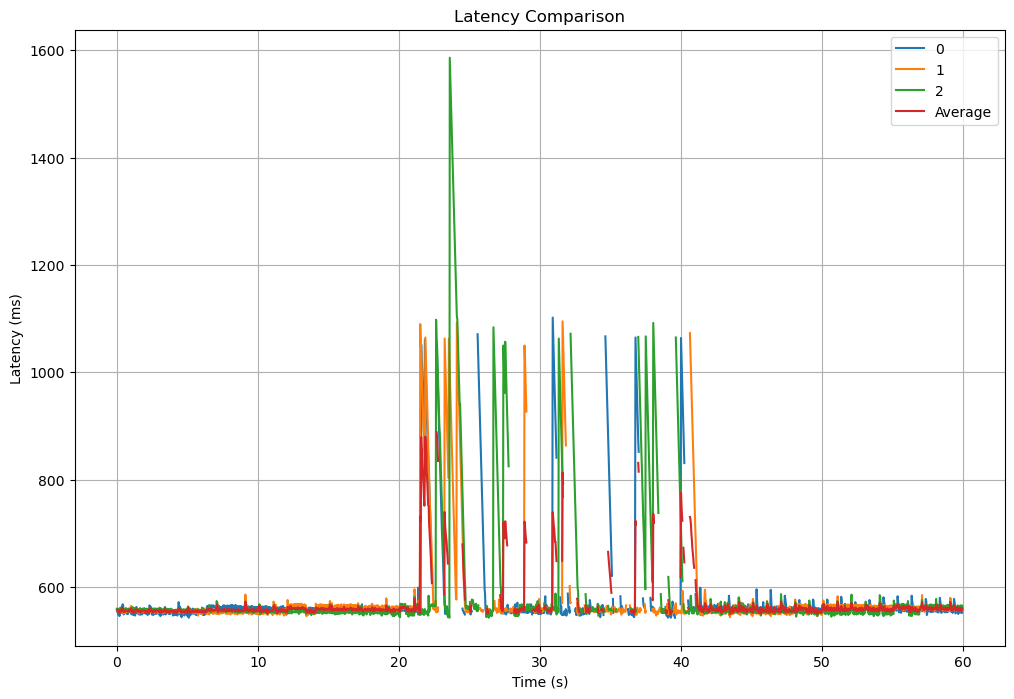

In [137]:
# Function to sample and smooth the data
def sample_and_smooth(data, timestamp_col, value_col, sample_rate=1, window_size=30):
    # Sampling
    sampled_data = data.iloc[::sample_rate, :]
    
    # Smoothing using a rolling window
    smoothed_values = sampled_data[value_col].rolling(window=window_size).mean()
    
    return sampled_data[timestamp_col], smoothed_values

# Sampling rate and window size for smoothing
sample_rate = 1  # Take every 30th frame
window_size = 1  # Rolling window size for smoothing

# Plotting
plt.figure(figsize=(12, 8))

# Sample and smooth data for each scenario
timestamps_0, smoothed_0 = sample_and_smooth(df_data_0, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_1, smoothed_1 = sample_and_smooth(df_data_1, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_2, smoothed_2 = sample_and_smooth(df_data_2, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)
timestamps_avg, smoothed_avg = sample_and_smooth(df_data_avg, '_1_rawVideoTimestamp', '_8_totalTime', sample_rate, window_size)

# Plotting the smoothed data
plt.plot(timestamps_0, smoothed_0, label='0')
plt.plot(timestamps_1, smoothed_1, label='1')
plt.plot(timestamps_2, smoothed_2, label='2')
plt.plot(timestamps_avg, smoothed_avg, label='Average')

# Adding labels, grid, and legend
plt.xlabel('Time (s)')
plt.ylabel('Latency (ms)')
plt.grid(True)
plt.legend()
plt.title('Latency Comparison')
plt.show()


In [138]:
json_data = df_data_avg.to_json(orient='records')

# Step 4: Save the JSON data to a file
output_file_path = f'average_data/{file_name} (avg).json'
with open(output_file_path, 'w') as json_file:
    json_file.write(json_data)

# print(f'JSON file saved to {output_file_path}')